# Basic Setup

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools

In [3]:
work_dir = r"D:\Projects\Google Play Store\data"

In [4]:
app_data = pd.read_csv(os.path.join(work_dir, 'googleplaystore.csv'))

In [5]:
app_reviews = pd.read_csv(os.path.join(work_dir, 'googleplaystore_user_reviews.csv'))

In [6]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
app_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [8]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [10]:
apps_from_data = set(app_data.App.unique())

In [11]:
apps_from_review = set(app_reviews.App.unique())

In [12]:
len(apps_from_data.intersection(apps_from_review))

1020

In [13]:
len(app_reviews.App.unique())

1074

# Two types of Analysis:

- Dataset with Apps Reviews
- Dataset without reviews

## Dataset without Reviews

In [14]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [15]:
app_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [17]:
per_missing = (app_data.isnull().sum()/app_data.count())*100

In [18]:
per_missing

App                0.000000
Category           0.000000
Rating            15.736095
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009225
Price              0.000000
Content Rating     0.009225
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073848
Android Ver        0.027680
dtype: float64

Reviews has near to 16% (15.7% to be precise) missing values.

3 approches can be applied
- Removing all values
- Statistical method: Mean, median, mode
- Creating seperate model for handling these values (much more time)

I need to test both the approches. Removing the values will be my last approch. 

## Visual presentation of missing values

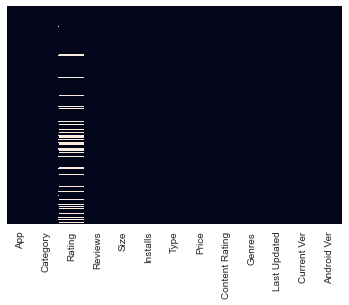

In [44]:
sns.heatmap(app_data.isnull(), cbar=False, yticklabels=False);

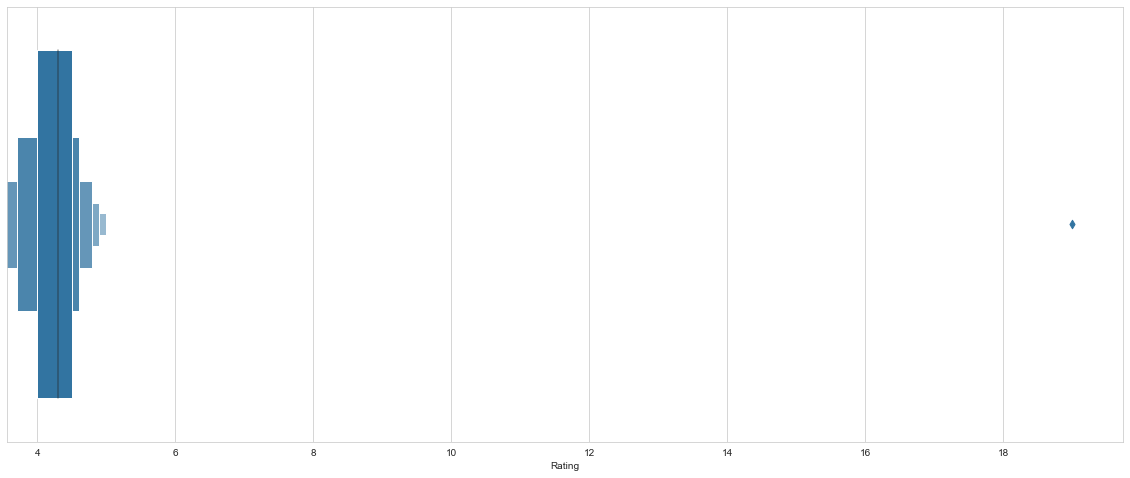

In [169]:
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.boxenplot(x='Rating', data=app_data);

There is an outlier in ratings as Google apps are scaled on a scale of 0 to 5. It maybe an error while scrapping data.

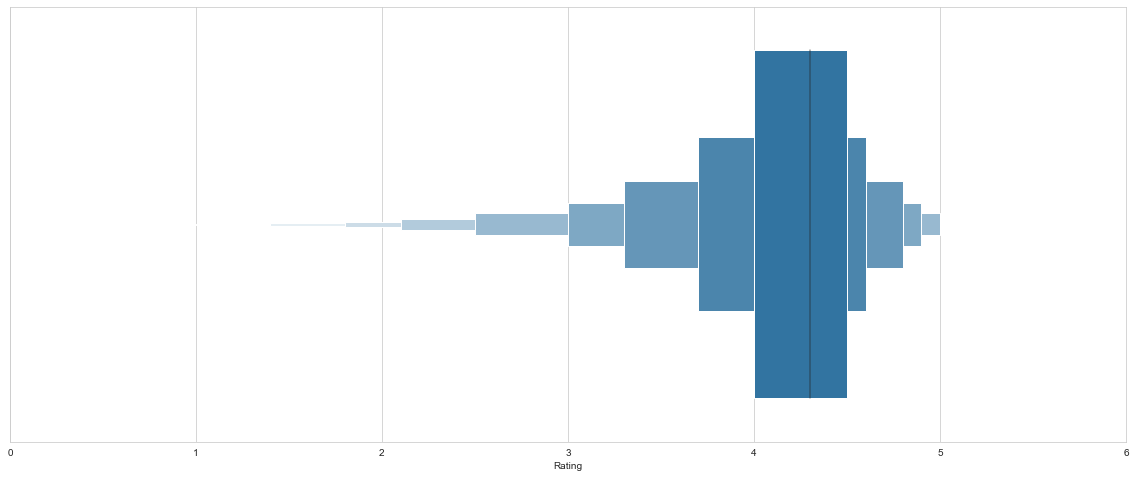

In [168]:
plt.figure(figsize=(20,8))
plt.xlim(0,6)
sns.set_style('whitegrid')
sns.boxenplot(x='Rating', data=app_data);

In [25]:
app_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [32]:
app_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [43]:
app_data.groupby(by='Category').mean()

,Rating
Category,
1.9,19.000000
ART_AND_DESIGN,4.358065
AUTO_AND_VEHICLES,4.190411
BEAUTY,4.278571
BOOKS_AND_REFERENCE,4.346067
BUSINESS,4.121452
COMICS,4.155172
COMMUNICATION,4.158537
DATING,3.970769


In [48]:
app_data.Rating.mean()

4.193338315362448

Now I will fill the missing values with average of each category 

In [57]:
app_data.groupby(by='Category').mean().index[1:]

Index(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE',
       'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION',
       'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK',
       'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'],
      dtype='object', name='Category')

In [56]:
app_data.groupby(by='Category').mean().values[1:]

array([[4.35806452],
       [4.19041096],
       [4.27857143],
       [4.34606742],
       [4.12145215],
       [4.15517241],
       [4.15853659],
       [3.97076923],
       [4.38903226],
       [4.1261745 ],
       [4.43555556],
       [4.19227247],
       [4.13188854],
       [4.16697248],
       [4.28632634],
       [4.27710438],
       [4.19736842],
       [4.17846154],
       [4.09490446],
       [4.0516129 ],
       [4.18914286],
       [4.13218884],
       [4.3       ],
       [4.33598726],
       [4.19211356],
       [4.21139601],
       [4.25966387],
       [4.25559846],
       [4.22351097],
       [4.04741144],
       [4.10929204],
       [4.06375   ],
       [4.244     ]])

In [121]:
averages = dict(zip(app_data.groupby(by='Category').mean().index[1:], app_data.groupby(by='Category').mean().values.tolist()[1:]))

In [122]:
averages['BUSINESS']

[4.121452145214522]

In [147]:
df_small = app_data.iloc[:500]

In [153]:
def category_fill(x):
    rating = x[0]
    category = x[1]
    if pd.isnull(rating):
        if category in averages.keys():
            return averages[category][0]

    else:
        return rating


In [154]:
app_data['new_rating'] = app_data[['Rating', 'Category']].apply(category_fill, axis=1)

## New Rating vs Old Missing Rating

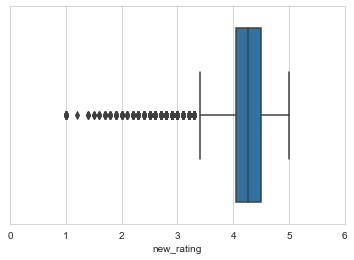

In [160]:
plt.xlim(0,6)
sns.boxplot(app_data['new_rating']);

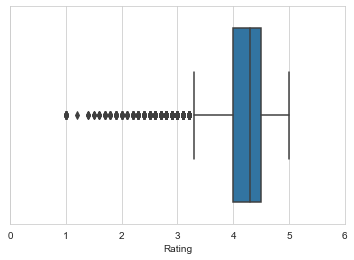

In [161]:
plt.xlim(0,6)
sns.boxplot(app_data['Rating']);

It means that the data is non affected and we can proceed further

In [212]:
app_data.drop('Rating', axis=1, inplace=True)

In [214]:
app_data.dropna(inplace=True)

In [215]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Reviews         10829 non-null  object 
 3   Size            10829 non-null  object 
 4   Installs        10829 non-null  object 
 5   Type            10829 non-null  object 
 6   Price           10829 non-null  object 
 7   Content Rating  10829 non-null  object 
 8   Genres          10829 non-null  object 
 9   Last Updated    10829 non-null  object 
 10  Current Ver     10829 non-null  object 
 11  Android Ver     10829 non-null  object 
 12  new_rating      10829 non-null  float64
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


## Converting rest of the values into correct data type

In [221]:
app_data['Reviews'] = app_data.Reviews.astype(int)

In [252]:
app_data.Size.str.findall(r'\d')

0        [1, 9]
1        [1, 4]
2        [8, 7]
3        [2, 5]
4        [2, 8]
          ...  
10836    [5, 3]
10837    [3, 6]
10838    [9, 5]
10839        []
10840    [1, 9]
Name: Size, Length: 10829, dtype: object

In [268]:
def merge_size(size):
    
    if len(size)!=0:
        return ''.join([str(i) for i in size])
    else:
        return 0

In [274]:
app_data["Size"] = app_data.Size.str.findall(r'\d').apply(merge_size).astype(int)

In [277]:
app_data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

Extact number of installations are not mentioned here so we can keep this column as it is

In [280]:
app_data.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [290]:
app_data["Price"] = app_data.Price.str.replace('$', '').astype(float)

In [292]:
app_data["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [296]:
app_data.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [300]:
app_data["Last Updated"] = pd.to_datetime(app_data["Last Updated"])

In [321]:
mask = app_data["Current Ver"] == "Varies with device"

In [323]:
app_data[mask].tail()

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,new_rating
10725,Posta App,MAPS_AND_NAVIGATION,8,0,"1,000+",Free,0.0,Everyone,Maps & Navigation,2017-09-27,Varies with device,4.4 and up,3.6
10765,Chat For Strangers - Video Chat,SOCIAL,622,0,"100,000+",Free,0.0,Mature 17+,Social,2018-05-23,Varies with device,Varies with device,3.4
10826,Frim: get new friends on local chat rooms,SOCIAL,88486,0,"5,000,000+",Free,0.0,Mature 17+,Social,2018-03-23,Varies with device,Varies with device,4.0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,0,"1,000+",Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,4.5
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,398307,19,"10,000,000+",Free,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device,4.5


In [325]:
app_data["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)